In [3]:
# https://forums.fast.ai/t/fastai-on-apple-m1/86059/39
# don’t actually understand how/why this works with the OMP_NUM_THREADS=1
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [4]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

# Determine if the image is a cat
def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)

/Users/mton/Documents/GitHub/JupyterJeep/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/mton/Documents/GitHub/JupyterJeep/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/mton/Documents/GitHub/JupyterJeep/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.693147,inf,0.534506,02:07


epoch,train_loss,valid_loss,error_rate,time
0,0.693133,inf,0.411367,04:15


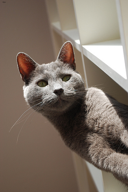

In [9]:
"""
# Need to install and import pywidgets locally
# will skip file import test for now
uploader = widgets.FileUpload()
uploader
"""

# instead we will use a random file from the dataset -- BAD MIKE LOL
files = get_image_files(path)
randomFile = files[random.randint(0, len(files))]
#files = random.shuffle(files)
img =  PILImage.create(randomFile)  # type: ignore
img.to_thumb(192) #type: ignore

In [10]:
is_cat,_, probs=learn.predict(img)  # type: ignore
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat : {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat : 0.005694
